**Plotting in Python 3**
- Each plot has a `matplotlib` solution, a `pandas` solution and a `seaborn` solution.
- Rana and Giorgio: `plotly` offers best solution

- Plot style can be customized [link](https://matplotlib.org/users/style_sheets.html)

- [Python graph gallery](http://python-graph-gallery.com/) contains cool examples
- [Seaborn tutorial](https://seaborn.pydata.org/tutorial.html) and the [part on distribution](https://seaborn.pydata.org/tutorial/distributions.html) shows standard solutions for easy problems
- [Material darker](https://github.com/oriolmirosa/jupyterlab_materialdarker) theme for JupyterLab.
- Get HTML color codes from image [link](https://html-color-codes.info/colors-from-image/)

## Load libraries and check config

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

Here is where config files are stored:

In [2]:
mpl.get_configdir()

'/Users/tommasobiancalani/.matplotlib'

In [3]:
tommy_found = any([style for style in plt.style.available if style == 'tommy_style'])
darkbg_found = any([style for style in plt.style.available if style == 'dark_background'])
n_styles = len(plt.style.available)
print('{} `matplotlib` styles available.'.format(n_styles))
print('`tommy_style` is among these: {}.'.format(tommy_found))
print('`dark_background` is among these: {}.'.format(darkbg_found))

27 `matplotlib` styles available.
`tommy_style` is among these: True.
`dark_background` is among these: True.


## Test tommy_style

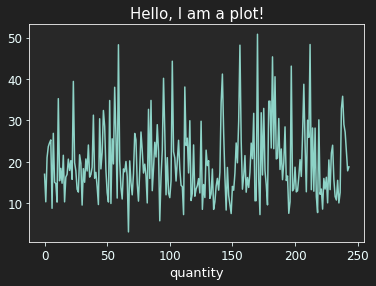

In [28]:
plt.style.use('tommy_style')
df = sns.load_dataset('tips')
df.total_bill.plot();
plt.title('Hello, I am a plot!');
plt.xlabel('quantity');

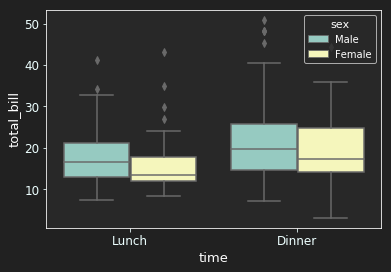

In [29]:
sns.boxplot(x=df.time, y=df.total_bill, hue=df.sex);

## Play w custom style

Style variables are saved into global `mpl.rcParam` and can be dynamically modified.

In [13]:
len(mpl.rcParams)

299

In [14]:
plt.style.use(['dark_background', 'tommy_style'])

In [16]:
# Colors
mpl.rcParams['text.color'] = '#C791EA'
mpl.rcParams['text.color'] = 'white'
mpl.rcParams['figure.facecolor'] = '#212121'
mpl.rcParams['axes.facecolor'] = '#282828'
mpl.rcParams['xtick.color'] = '#EDFFFF'
mpl.rcParams['ytick.color'] = '#EDFFFF'
mpl.rcParams['axes.edgecolor'] = 'white'
mpl.rcParams['grid.color'] = '#282828'
mpl.rcParams['lines.color'] = 'white'
# Sizes
mpl.rcParams['axes.titlesize'] = 15
mpl.rcParams['axes.labelsize'] = 13
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12

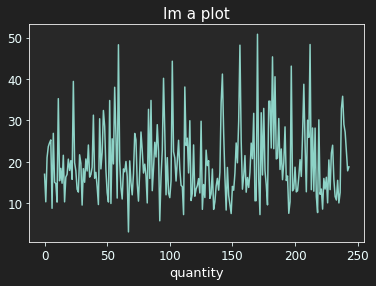

In [17]:
df = sns.load_dataset('tips')
df.total_bill.plot();
plt.title('Im a plot');
plt.xlabel('quantity');

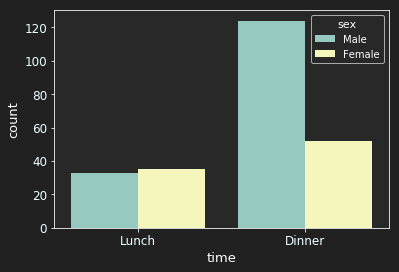

In [18]:
sns.countplot(data=df, x='time', hue='sex');

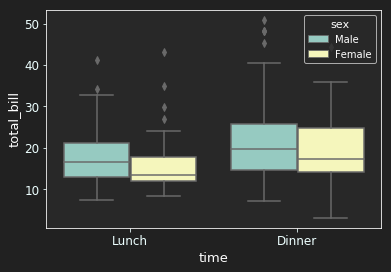

In [19]:
sns.boxplot(x=df.time, y=df.total_bill, hue=df.sex);

# matplotlib summary
- Start from `fig, ax = plt.subplots(ncols=...)`.
- Plot stuff on `ax` directly. `e.g.` `ax.plot()`.
- Plot `ax.errorbar` for adding errors (which needs to be computed).
- Figure features (e.g. `figsize`) are passed to `subplots`, whereas axes features are usually set by `ax.set_something('bla')`.
- Why use `plt.plot` rather than `plt.scatter` for scatter plots [post](https://jakevdp.github.io/PythonDataScienceHandbook/04.02-simple-scatter-plots.html)
- Sometimes `matplotlib` is incredibly stupid and I need to pass the points in a `for-loop` (see PCA on iris)[link](https://stackoverflow.com/questions/34028255/set-height-and-width-of-figure-created-with-plt-subplots-in-matplotlib)
- Can set figure height directly with `fig.set_figheight` [link](https://stackoverflow.com/questions/14770735/changing-figure-size-with-subplots)
- Take out axes w `plt.axis('off')`
- `fig.tight_layout` rescale figure to fit cell space.

**Multiple plots**
- Can also do `plt.figure` and then add subplots `fig.add_subplot`
- Can also use `gridspec` module [link]
- `axs.flatten()` to loop through subplots


# Seaborn summary

**For numericals**
- `distplot` for histograms and single variate distributions
- `joinplot` for scatterplots
- `pairplot` to quickly inspect correlation in a dataset
- `lineplot` (but I like more matplotlib `plot` or from `pandas`)

**For categoricals**
- `countplot` for showing the histogram (no. occurrences) wrt categories.

**For numerical vs categorical**
- `boxplot` gives a good idea of the distribution. Using `hue` can add a further categorical.
- `pointplot` gives less info but i can add more categories

**For simple fitting**
- `lmplot` (not documented in my examples)


# Working w categorical data

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = sns.load_dataset('titanic')

In [53]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


How many people embarked from each port?

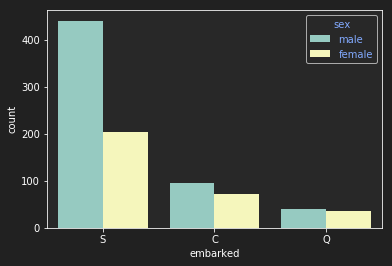

In [54]:
sns.countplot(data=df, x='embarked', hue='sex');

Boxplots allow visualization of distributions of numericals by changing a categorical. Hue allows a further categorical to be compared against

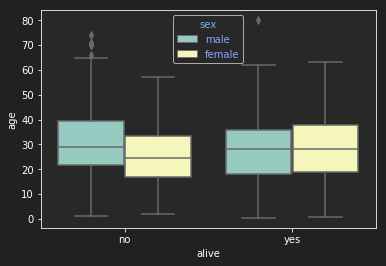

In [55]:
sns.boxplot(x=df.alive, y=df.age, hue=df.sex);

Pointplot does the same thing by plots only one statistics w error from the distribution.

/Users/tommasobiancalani/anaconda3/envs/scanpy/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


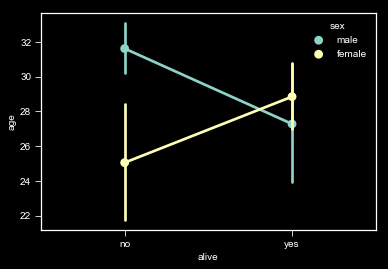

In [15]:
sns.pointplot(x=df.alive, y=df.age, hue=df.sex);

In this way I can overlay more colors

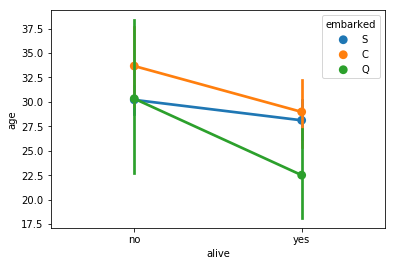

In [8]:
sns.pointplot(x=df.alive, y=df.age, hue=df.embarked);

`FacetGrid` is good for adding plots by changing one category. Careful though that it can mess things up. Like here.... 

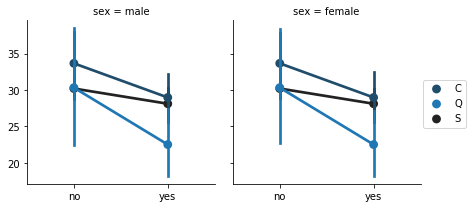

In [9]:
fg = sns.FacetGrid(data=df, col='sex')
fg.map(sns.pointplot, x=df.alive, y=df.age, hue=df.embarked, order=['no', 'yes'], 
       hue_order=['S', 'C', 'Q']);
fg.add_legend()

`FacetGrid` is more powerful but `factorplot` is more convenient. Here's the right figure:

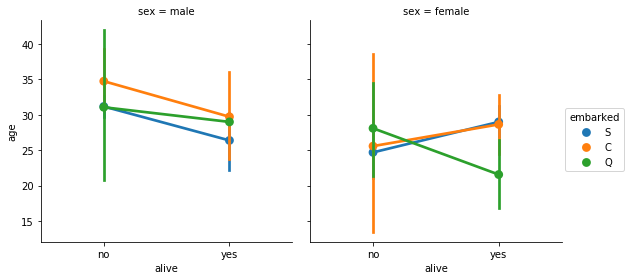

In [10]:
sns.factorplot(data=df, col='sex', x='alive', y='age', hue='embarked');

Using king allows me to choose different plots.

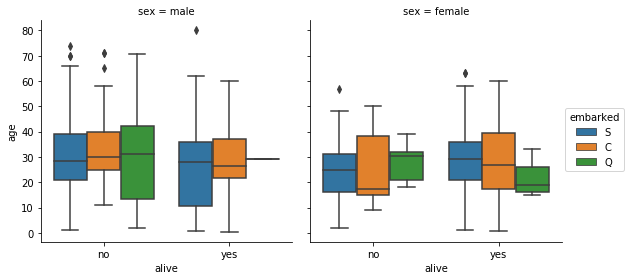

In [11]:
sns.factorplot(data=df, col='sex', x='alive', y='age', hue='embarked', kind='box');

# Working w numerical data

### Pairplot to quickly visualize correlation between features

/Users/tommasobiancalani/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/Users/tommasobiancalani/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


ValueError: max must be larger than min in range parameter.

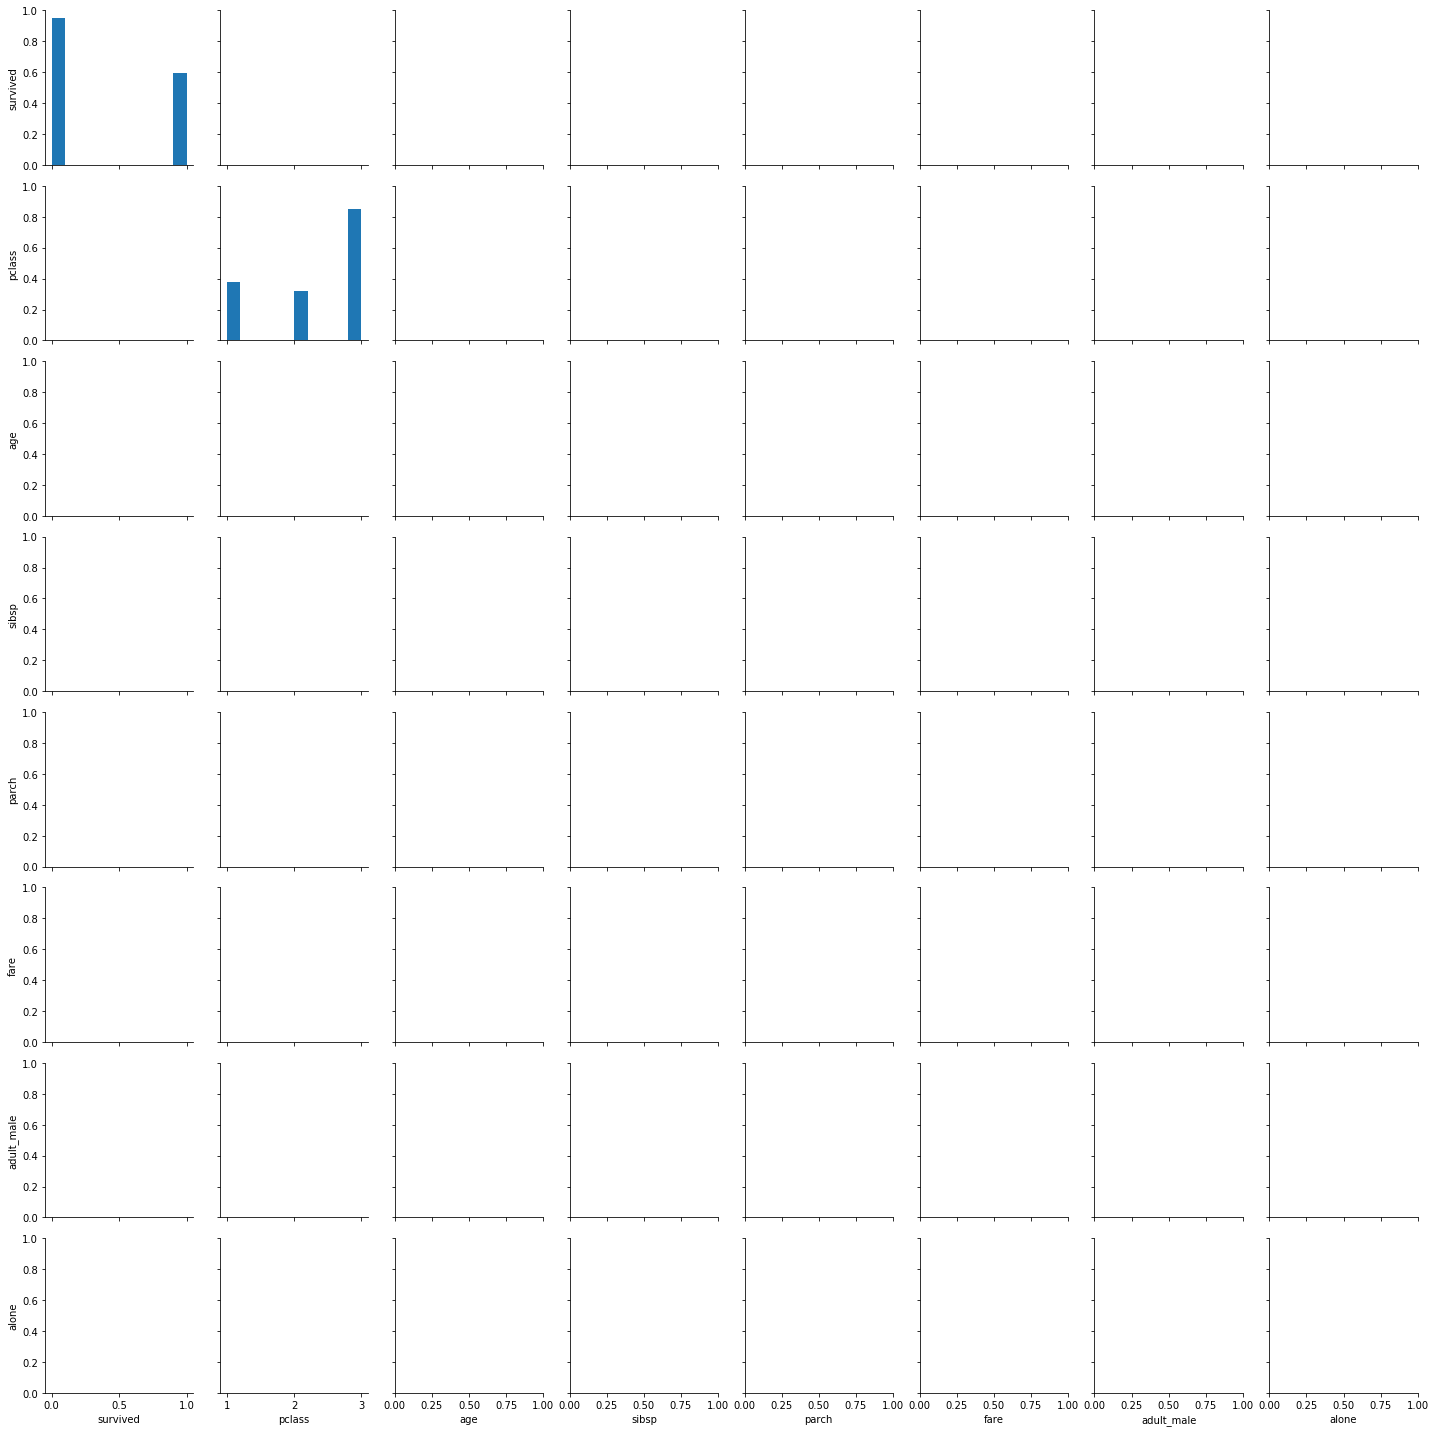

In [12]:
sns.pairplot(df)

### Histograms (univariate distributions)
- `sns.distplot` in seaborn

In [ ]:
plt.hist(df.total_bill);

In [ ]:
df['total_bill'].hist()

In [ ]:
sns.distplot(df.total_bill);

### Scatterplots

**In matplotlib**
- Create `subplots` (plural!) using matplotlib indicating number of figures and what they share.
- subplots returns a figure and several axes which can be configured.
- Then add each plot to each axis

In [2]:
fig, ax = plt.subplots()
fig.set_figheight(3)
fig.set_figwidth(5)
ax.set_xlabel('total_bill')
ax.set_ylabel('tips')
ax.plot(df.total_bill, df.tip, 'ro');

NameError: name 'plt' is not defined

**In pandas**
- More convenient because it sets several features automatically.
- Such as labels.

In [ ]:
df.plot('total_bill', 'tip', kind='scatter');

**Seaborn** 
the standard solution is `jointplot`

In [ ]:
sns.jointplot(df.total_bill, df.tip);

Regplot also works

In [ ]:
sns.regplot(df.total_bill, df.tip, fit_reg=True);

But this can be added to joinplot that thus remains standard choice

In [ ]:
sns.jointplot(df.total_bill, df.tip, kind='reg');

# Multiple plots
**Use multiple plots (trellice/lattice chart)**: 
- `factorplot` is a convenience function for calling a `FacetGrid` **for categorical plots**.
- From `factorplot` I can control things such as aspect ratio and size.
- So, it's **ALWAYS** convenient to call everyplot as a factorplot.
- To customize `factorplot`: `factorplot` returns `FacetGrid` instance which has a `set` method that takes `plot` argument.

**How to use `FacetGrid`**:
- Initialize `FacetGrid` object with the variables used to structure the grid.
- Plotting functions applied to each grid element by calling `FacetGrid.map()` or `FacetGrid.map_dataframe()`. 
- Finally, the plot can be tweaked with other methods to do things like change the axis labels, use different ticks, or add a legend. 

### Overlay multiple plots

Di default vanno sullo stesso `ax` ma cosi' ho difficolta' a configurarlo

/Users/tommasobiancalani/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/tommasobiancalani/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


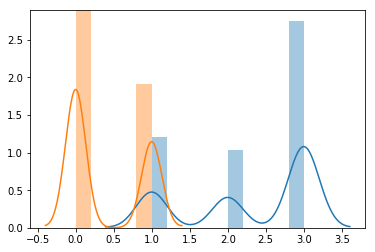

In [19]:
sns.distplot(df.pclass.values)
sns.distplot(df.survived.values)

/Users/tommasobiancalani/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/tommasobiancalani/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


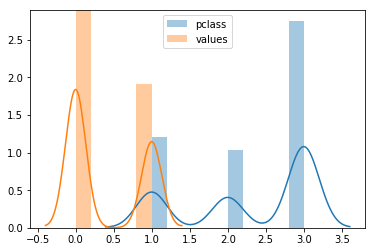

In [25]:
fig, ax = plt.subplots()
sns.distplot(df.pclass.values, ax=ax)
sns.distplot(df.survived.values, ax=ax)
ax.legend(['pclass', 'values'])

Se invece uso `matplotlib` devo chiamare tutto dall'`Axes`

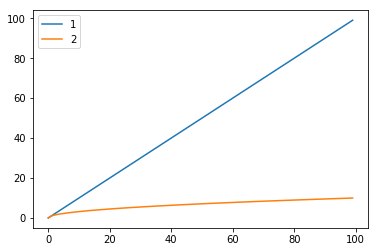

In [10]:
import numpy as np
import matplotlib.pyplot as plt
data = range(100)
data2 = np.sqrt(range(100))
fig, ax = plt.subplots()
ax.plot(data)
ax.plot(data2)
ax.legend(['1', '2']);

### Multiple panels
- Un'idea e' usare i `plt.subplots`. Non si sposano bene con i `factorplot` ma posso metterli in stack.
- How to use `jointplot` in `subplots` [StackExchange](https://stackoverflow.com/questions/35042255/how-to-plot-multiple-seaborn-jointplot-in-subplot)

/Users/tommasobiancalani/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/tommasobiancalani/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


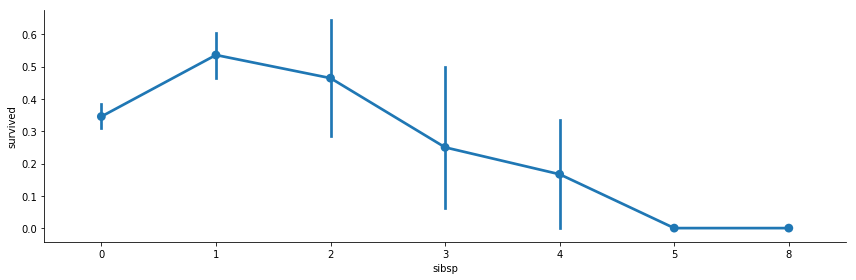

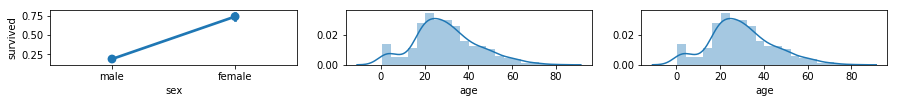

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
df = sns.load_dataset('titanic')
sns.factorplot(data=df, x='sibsp', y='survived', kind='point', aspect=3);

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,1));

sns.pointplot(data=df, y='survived', x='sex', ax=ax1);
sns.distplot(df.age.dropna(), ax=ax2);
sns.distplot(df.age.dropna(), ax=ax3);

### Loop over multiple subplots
the loop is created by `subplots` but use `flatten` to loop over it

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
plt.style.use('dark_background')
(x_trn, y_trn), (x_tst, y_tst) = mnist.load_data()
x_trn.shape

(60000, 28, 28)

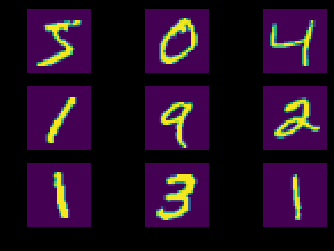

In [19]:
fig, axs = plt.subplots(3,3, sharex=True, sharey=True)
for ix, ax in enumerate(axs.flatten()):
    ax.axis('off')
    ax.imshow(x_trn[ix])